# COGS 118A- Project Proposal

# Names


- Kimberly Liu
- Ruoxuan Li
- Juan Castillejos-Garcia
- Manan Surana

#Abstract
Our goal of the project is to find the best method l to predict the readmission rates of diabetes patients in US by comparing different 4 classification methods learned in class. The data that we will use represents 10 years (1999–2008) of clinical care at 130 hospitals and integrated delivery networks throughout the United States. It contains over 50 attributes such as patient number, race, gender, and age, etc. and classification labels: >30(readmitted after 30 days), <30 (readmitted within 30 days), and no (no readmission). We will first split the data into the training set and the testing set. Then we are going to select a range of attributes and use them to predict the readmission rates via ML methods such as SoftMax regression, multi-class SVM, KNN, and decision tree/random forest. The performance of our models will be measured by evaluating the rates of Type 1 and Type 2 errors.

# Background
Diabetes is associated with an increased risk of heart disease, stroke, high blood pressure and narrowing of blood vessels<a name = "https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193#:~:text=Potential%20complications%20of%20diabetes%20and,damage%20(neuropathy)%20in%20limbs."></a>[<sup>[1]</sup>](#abc). The high readmission rates of diabetes patients bring heavy burden to the medical systems in the US.
According to one of the research, thirty-day readmission rates for hospitalized patients with diabetes are reported to be between 14.4 and 22.7%, much higher than the rate for all hospitalized patients (8.5–13.5%)<a name="https://clindiabetesendo.biomedcentral.com/articles/10.1186/s40842-016-0040-x"></a>[<sup>[2]</sup>](#admonishnote). In order to provide better care for patients who are diagnosed with diabetes, some researchers have attempted to predict the readmission rates with certain attributes associated with patients.
Prior study done by _Strack, Beata, et al_. suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis<a name="https://www.hindawi.com/journals/bmri/2014/781670/"></a>[<sup>[3]</sup>](#wfds) using multivariable logistic regression. 
In this project, we want to explore machine learning algorithms that might help us better predict the readmission rates to which could be useful for small town policy makers to allocate medical resources and personnel more appropriately.


# Problem Statement

The U.S has a problem of access to health care<a name="ander"></a>[<sup>[4]</sup>](#ander). The number of health care professional required to service the aging population is greater than the number of well-trained medical professionals being supplied. Rural areas are especially vulnerable to not having many qualified doctors and nurses<a name="ziller"></a>[<sup>[5]</sup>](#ziller). Our goal of this project is improving patient outcomes by exploring the accuracy of 4 machine learning models in predicting readmission rate of patients using historic data collected over 10 years. Most hospitals keep a clinical history for every patient admitted which in rural areas can be used as input to an efficient machine learning algorithm to predict staffing and funding needs. Our project seeks to use features found in such clinical histories to label a patient into each of the 3 readmission categories. For any given time interval of a hospital, a "future prediction set" can be put through the algorithm with best performance to label each patient. Taking the count of each of the patients in the predcition set labeled as needing readmission, the readmission rate in the following 30 days can be computed.

# Data

__What datasets do we need? Why do we need them?__

- For our objective, we will be needing a training dataset and a test dataset. The training dataset will be used to train the different machine learning algorithms or the classifiers that we will be using. After traning our models or classifiers with the training dataset, we will need a testing dataset to test them.

- We are going to be using the "Diabetes 130-US hospitals" dataset training and testing dataset. We will split the dataset into two parts for testing and training.


__Diabetes 130-US hospitals dataset__

- Source: The UCI Machine Learning Repository, collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. 

- Link: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

- Size (# of variables, # of observations): There are 55 different variables that represent each observation. There are 100,000 observations present in the dataset

- Observations: The dataset represents clinical care provided between 1999 to 2008 at 130 US hospitals. The dataset contains of categorical and quantitative variables

  Each observation consists of attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, HbA1c test result etc.

- Special Handling: Missing Values 


######Data Exploration

The original link https://archive.ics.uci.edu/ml/machine-learning-databases/00296/ only allows for donwloading the zip file to our local enviroment. To get around this problem and allow for real time collaboration we are using google drive to store the original data files and the post processing data files. All 4 menbers have acess to the shared drive and the notebook, but if the grader tries to run the notebook an error may occur. We include comments of how to run the code locally if the files datafile is in the same directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_raw = pd.read_csv (r'/content/drive/Shared drives/cogs118A/dataset_diabetes/diabetic_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If the file diabetic_data.csv is in the same folder as the notebook please uncomment line below and run

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_raw = pd.read_csv (r './diabetic_data.csv')

We start looking at the contents of each of the colunms of our dataframe

In [ ]:
data_raw.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

'Encounter_id' and 'patient_nbr' are numerical values that help identify a patient. Their distribution is irrelevant to the problem.

Race is a nominal variable with values and distribution:

In [ ]:
print(np.unique(data_raw['race']))

['?' 'AfricanAmerican' 'Asian' 'Caucasian' 'Hispanic' 'Other']


In [ ]:
print(data_raw['race'].describe())

count        101766
unique            6
top       Caucasian
freq          76099
Name: race, dtype: object


<function matplotlib.pyplot.show>

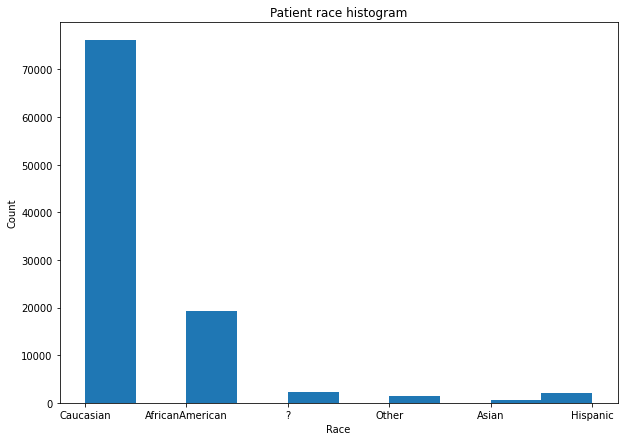

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['race'])
plt.xlabel("Race")
plt.ylabel("Count")
plt.title('Patient race histogram')
plt.show

Gender is a nominal variable with values and distribution:

In [ ]:
print(np.unique(data_raw['gender']))

['Female' 'Male' 'Unknown/Invalid']


In [ ]:
print(data_raw['gender'].describe())

count     101766
unique         3
top       Female
freq       54708
Name: gender, dtype: object


<function matplotlib.pyplot.show>

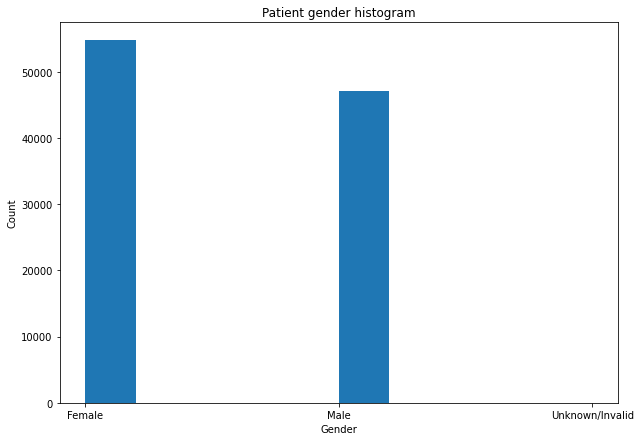

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title('Patient gender histogram')
plt.show

Age is a nominal variable grouped in intervals of 10 years and distribution:

In [ ]:
print(np.unique(data_raw['age']))

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


In [ ]:
print(data_raw['age'].describe())

count      101766
unique         10
top       [70-80)
freq        26068
Name: age, dtype: object


<function matplotlib.pyplot.show>

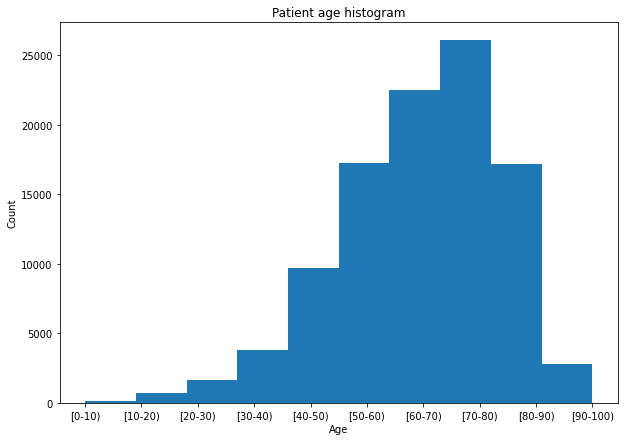

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Patient age histogram')
plt.show

We will convert the intervals to integers during the data cleaning process.

In [ ]:
print(np.unique(data_raw['weight']))

['>200' '?' '[0-25)' '[100-125)' '[125-150)' '[150-175)' '[175-200)'
 '[25-50)' '[50-75)' '[75-100)']


In [ ]:
print(data_raw['weight'].describe())

count     101766
unique        10
top            ?
freq       98569
Name: weight, dtype: object


<function matplotlib.pyplot.show>

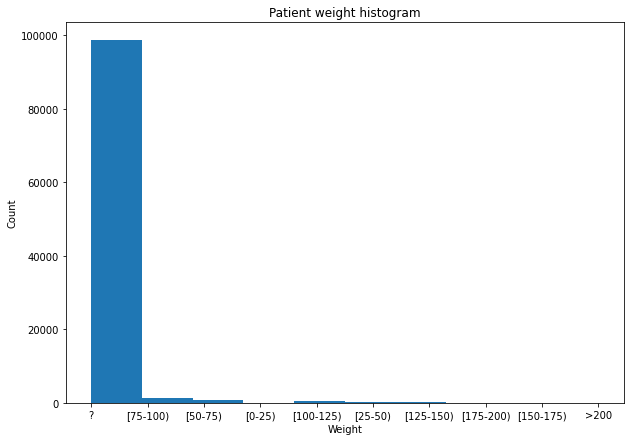

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['weight'])
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title('Patient weight histogram')
plt.show

In [ ]:
print(np.unique(data_raw['admission_type_id']))
print(data_raw['admission_type_id'].describe())

[1 2 3 4 5 6 7 8]
count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64


Most of the patients have '?' as their entry

<function matplotlib.pyplot.show>

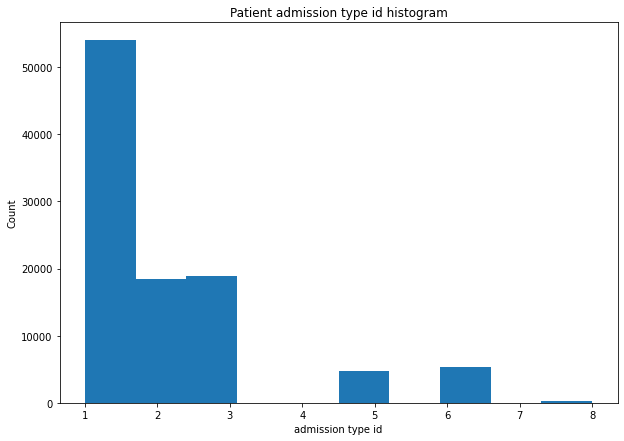

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['admission_type_id'])
plt.xlabel('admission type id')
plt.ylabel("Count")
plt.title('Patient admission type id histogram')
plt.show

Admission type id is a numeric value that represents the 8 different types of admission to the hospital

In [ ]:
print(np.unique(data_raw['discharge_disposition_id']))
print(data_raw['discharge_disposition_id'].describe())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 27 28]
count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64


<function matplotlib.pyplot.show>

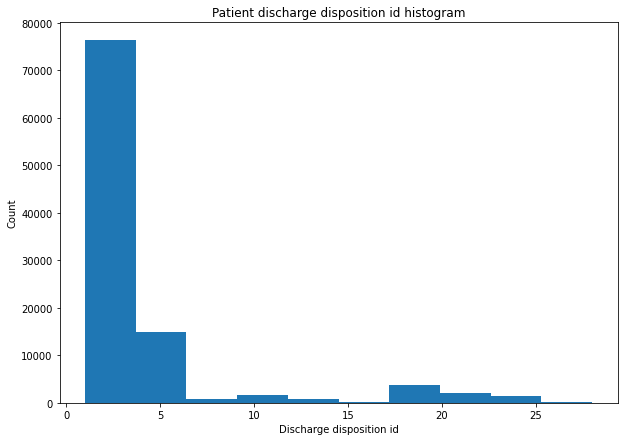

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['discharge_disposition_id'])
plt.xlabel('Discharge disposition id')
plt.ylabel("Count")
plt.title('Patient discharge disposition id histogram')
plt.show

discharge_disposition_id is a numeric value that represents the 28 different types of discharge from the hospital. For example Discharged to home, Not available, etc

In [ ]:
print(np.unique(data_raw['admission_source_id']))
print(data_raw['admission_source_id'].describe())

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 17 20 22 25]
count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64


<function matplotlib.pyplot.show>

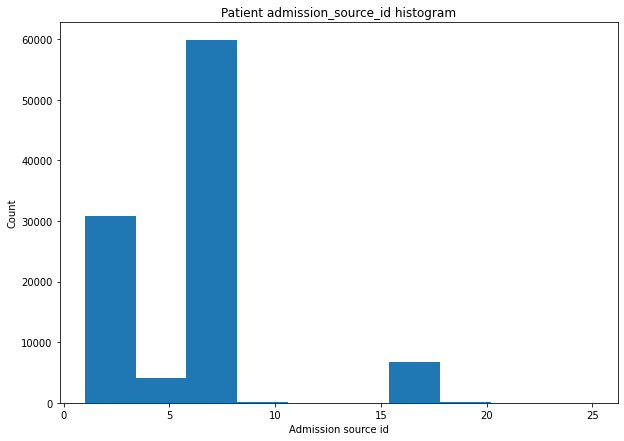

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['admission_source_id'])
plt.xlabel('Admission source id')
plt.ylabel("Count")
plt.title('Patient admission_source_id histogram')
plt.show

time_in_hospital is a numerical variable with the number of days between admission and discharge

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


<function matplotlib.pyplot.show>

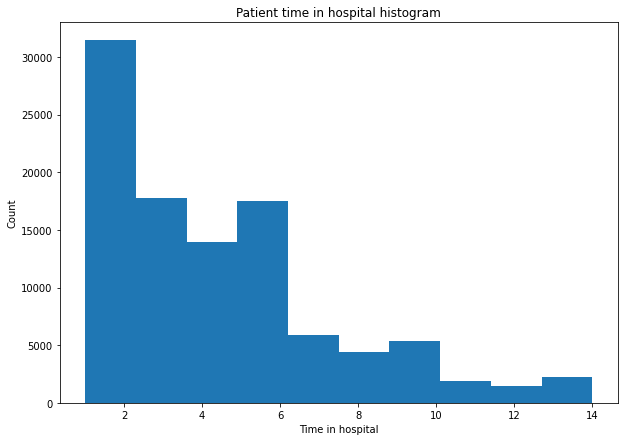

In [ ]:
print(np.unique(data_raw['time_in_hospital']))
print(data_raw['time_in_hospital'].describe())
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['time_in_hospital'])
plt.xlabel('Time in hospital')
plt.ylabel("Count")
plt.title('Patient time in hospital histogram')
plt.show

'payer_code' refers to the method that patient will use to cover the costs of hospital stay and  'medical_specialty' is the specialty of refering doctor. We will not be using these 2 variables.

'num_lab_procedures' is an integer with the number of lab procedures performed to patient 

 'num_procedures' is the number of procedures other than lab procedures performed to patient 
 
'num_medications' is an interger with the number of medications the patient is taking

<function matplotlib.pyplot.show>

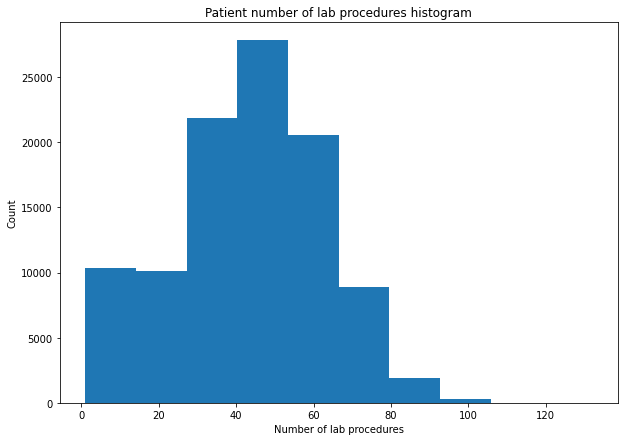

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['num_lab_procedures'])
plt.xlabel('Number of lab procedures')
plt.ylabel("Count")
plt.title('Patient number of lab procedures histogram')
plt.show

<function matplotlib.pyplot.show>

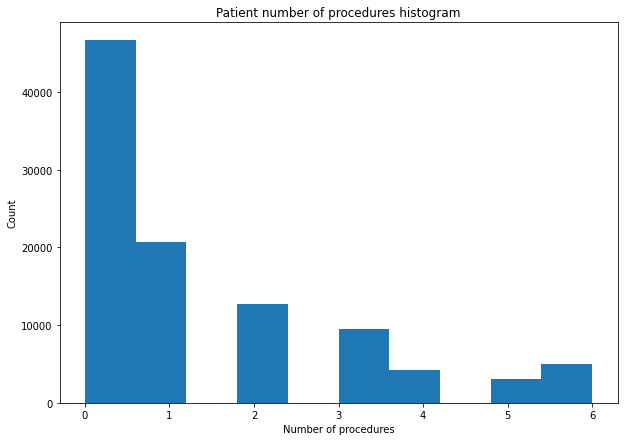

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['num_procedures'])
plt.xlabel('Number of procedures')
plt.ylabel("Count")
plt.title('Patient number of procedures histogram')
plt.show

<function matplotlib.pyplot.show>

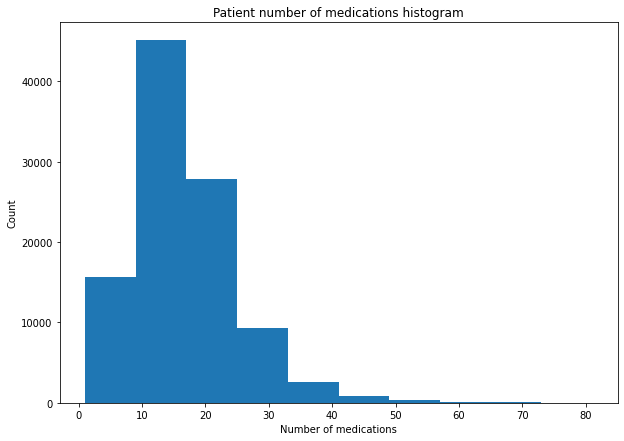

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['num_medications'])
plt.xlabel('Number of medications')
plt.ylabel("Count")
plt.title('Patient number of medications histogram')
plt.show

'number_outpatient', 'number_emergency', 'number_inpatient' are integers representing the number of visits(of each type) of the patient in the year preceding the encounter

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 33 34 35 36 37 38 39 40 42]
count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64


<function matplotlib.pyplot.show>

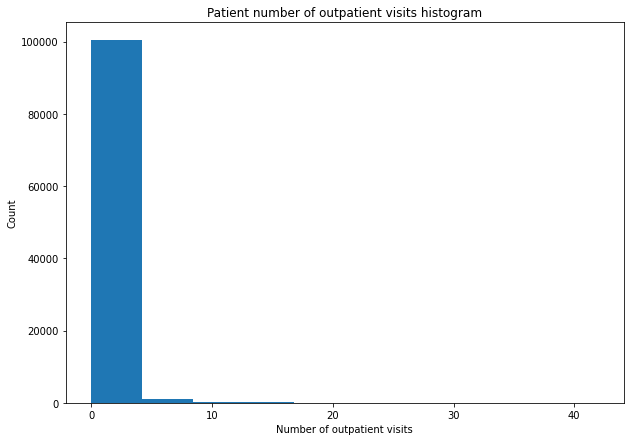

In [ ]:
print(np.unique(data_raw['number_outpatient']))
print(data_raw['number_outpatient'].describe())
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['number_outpatient'])
plt.xlabel('Number of outpatient visits')
plt.ylabel("Count")
plt.title('Patient number of outpatient visits histogram')
plt.show

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 24 25
 28 29 37 42 46 54 63 64 76]
count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64


<function matplotlib.pyplot.show>

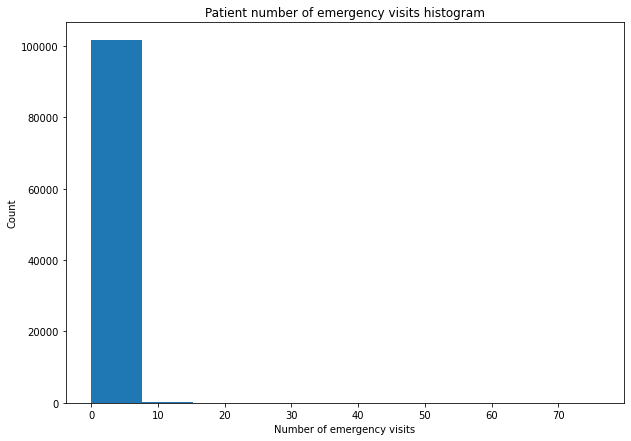

In [ ]:
print(np.unique(data_raw['number_emergency']))
print(data_raw['number_emergency'].describe())
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['number_emergency'])
plt.xlabel('Number of emergency visits')
plt.ylabel("Count")
plt.title('Patient number of emergency visits histogram')
plt.show

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64


<function matplotlib.pyplot.show>

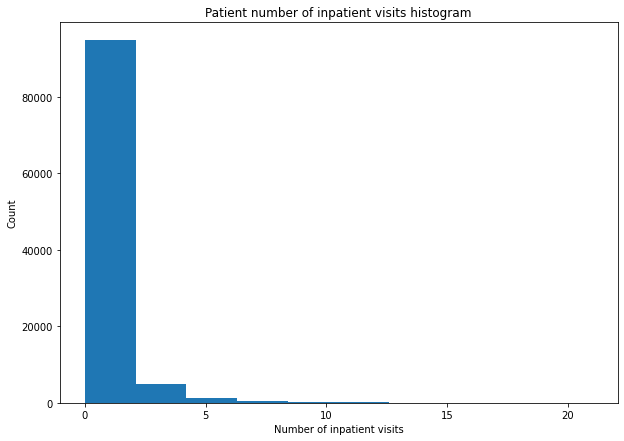

In [ ]:
print(np.unique(data_raw['number_inpatient']))
print(data_raw['number_inpatient'].describe())
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['number_inpatient'])
plt.xlabel('Number of inpatient visits')
plt.ylabel("Count")
plt.title('Patient number of inpatient visits histogram')
plt.show

The number of visits is very skewed to the left, but it makes sense since that most patients won't visit the hospital more than 3 times a year

'diag_1', 'diag_2', 'diag_3 are the diagnosis given to the patient. In the data a different diagnosis is a different number

In [ ]:
print(np.unique(data_raw['diag_1']))

['10' '11' '110' '112' '114' '115' '117' '131' '133' '135' '136' '141'
 '142' '143' '145' '146' '147' '148' '149' '150' '151' '152' '153' '154'
 '155' '156' '157' '158' '160' '161' '162' '163' '164' '170' '171' '172'
 '173' '174' '175' '179' '180' '182' '183' '184' '185' '187' '188' '189'
 '191' '192' '193' '194' '195' '196' '197' '198' '199' '200' '201' '202'
 '203' '204' '205' '207' '208' '210' '211' '212' '214' '215' '216' '217'
 '218' '219' '220' '223' '225' '226' '227' '228' '229' '23' '230' '233'
 '235' '236' '237' '238' '239' '240' '241' '242' '244' '245' '246' '250'
 '250.01' '250.02' '250.03' '250.1' '250.11' '250.12' '250.13' '250.2'
 '250.21' '250.22' '250.23' '250.3' '250.31' '250.32' '250.33' '250.4'
 '250.41' '250.42' '250.43' '250.5' '250.51' '250.52' '250.53' '250.6'
 '250.7' '250.8' '250.81' '250.82' '250.83' '250.9' '250.91' '250.92'
 '250.93' '251' '252' '253' '255' '261' '262' '263' '266' '27' '271' '272'
 '273' '274' '275' '276' '277' '278' '279' '280' '281' '282' 

In [ ]:
print(np.unique(data_raw['diag_2']))

['11' '110' '111' '112' '114' '115' '117' '123' '130' '131' '135' '136'
 '137' '138' '140' '141' '145' '150' '151' '152' '153' '154' '155' '156'
 '157' '162' '163' '164' '171' '172' '173' '174' '179' '180' '182' '183'
 '185' '186' '188' '189' '191' '192' '193' '195' '196' '197' '198' '199'
 '200' '201' '202' '203' '204' '205' '208' '211' '212' '214' '215' '217'
 '218' '220' '223' '225' '226' '227' '228' '232' '233' '235' '238' '239'
 '240' '241' '242' '244' '245' '246' '250' '250.01' '250.02' '250.03'
 '250.1' '250.11' '250.12' '250.13' '250.2' '250.21' '250.22' '250.23'
 '250.3' '250.31' '250.32' '250.33' '250.4' '250.41' '250.42' '250.43'
 '250.5' '250.51' '250.52' '250.53' '250.6' '250.7' '250.8' '250.81'
 '250.82' '250.83' '250.9' '250.91' '250.92' '250.93' '251' '252' '253'
 '255' '256' '258' '259' '260' '261' '262' '263' '266' '268' '269' '27'
 '270' '271' '272' '273' '274' '275' '276' '277' '278' '279' '280' '281'
 '282' '283' '284' '285' '286' '287' '288' '289' '290' '291' '292

In [ ]:
print(np.unique(data_raw['diag_3']))

['11' '110' '111' '112' '115' '117' '122' '123' '131' '132' '135' '136'
 '138' '139' '14' '141' '146' '148' '150' '151' '152' '153' '154' '155'
 '156' '157' '158' '161' '162' '163' '164' '17' '170' '171' '172' '173'
 '174' '175' '179' '180' '182' '183' '185' '186' '188' '189' '191' '192'
 '193' '195' '196' '197' '198' '199' '200' '201' '202' '203' '204' '205'
 '208' '211' '214' '215' '216' '217' '218' '220' '223' '225' '226' '227'
 '228' '230' '233' '235' '236' '238' '239' '240' '241' '242' '243' '244'
 '245' '246' '250' '250.01' '250.02' '250.03' '250.1' '250.11' '250.12'
 '250.13' '250.2' '250.21' '250.22' '250.23' '250.3' '250.31' '250.4'
 '250.41' '250.42' '250.43' '250.5' '250.51' '250.52' '250.53' '250.6'
 '250.7' '250.8' '250.81' '250.82' '250.83' '250.9' '250.91' '250.92'
 '250.93' '251' '252' '253' '255' '256' '258' '259' '260' '261' '262'
 '263' '265' '266' '268' '27' '270' '271' '272' '273' '274' '275' '276'
 '277' '278' '279' '280' '281' '282' '283' '284' '285' '286' '287' 

There are too many of them, but if needed we will encode them and use them for later experiments

'number_diagnoses' is a numerical value with the number of diagnoses for each patient. A patient may have different conditions besides diabetes.

<function matplotlib.pyplot.show>

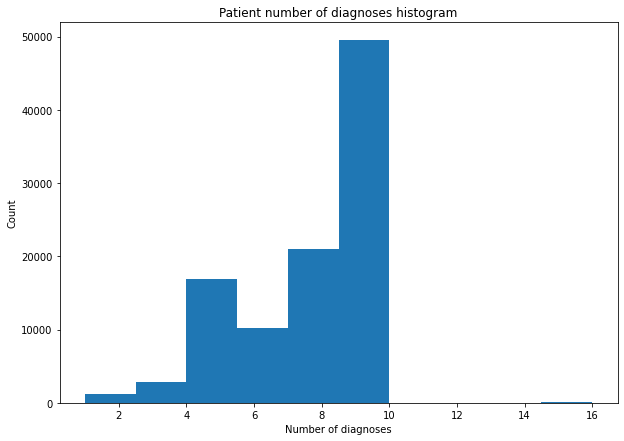

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['number_diagnoses'])
plt.xlabel('Number of diagnoses')
plt.ylabel("Count")
plt.title('Patient number of diagnoses histogram')
plt.show

'max_glu_serum' is a nominal varaible that indicates the range of the result or if the test was not taken.

<function matplotlib.pyplot.show>

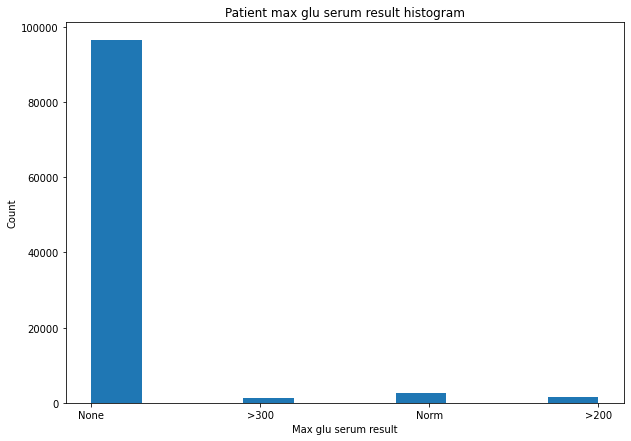

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['max_glu_serum'])
plt.xlabel('Max glu serum result')
plt.ylabel("Count")
plt.title('Patient max glu serum result histogram')
plt.show

'A1Cresult' is a nominal varaible that indicates the range of the result or if the test was not taken.

<function matplotlib.pyplot.show>

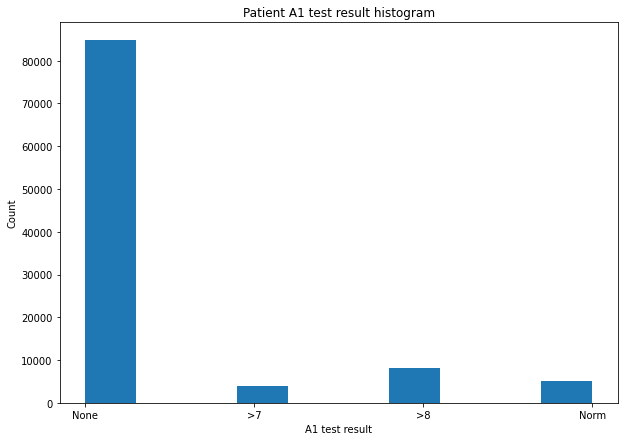

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['A1Cresult'])
plt.xlabel('A1 test result')
plt.ylabel("Count")
plt.title('Patient A1 test result histogram')
plt.show

'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone' are the manes of medications a patient could be taking. For each patient, the values can be 'up' if the dosage was increased, 'down' if the dosage was decreased, 'steady' if the dosage did not change, and 'no' if the drug was not prescribed. We don't look at the distribution of values, since we don't use these variables for our initial experiments. 

'change' is a nominal varaible that denotes if there was a change in medication.

'diabetesMed' is a nominal variable that indicates if a diabetes medication was prescribed

<function matplotlib.pyplot.show>

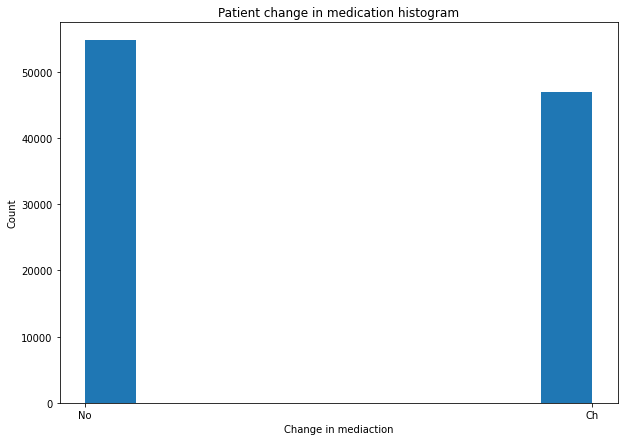

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['change'])
plt.xlabel('Change in mediaction')
plt.ylabel("Count")
plt.title('Patient change in medication histogram')
plt.show

<function matplotlib.pyplot.show>

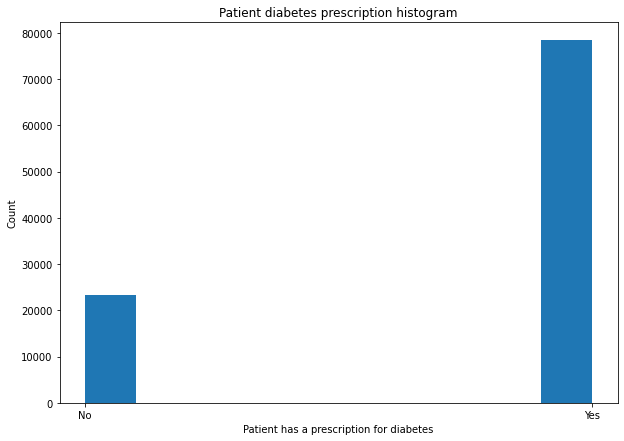

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['diabetesMed'])
plt.xlabel('Patient has a prescription for diabetes')
plt.ylabel("Count")
plt.title('Patient diabetes prescription histogram')
plt.show

'readmitted' is a nominal variable with 3 values which are our labels

<function matplotlib.pyplot.show>

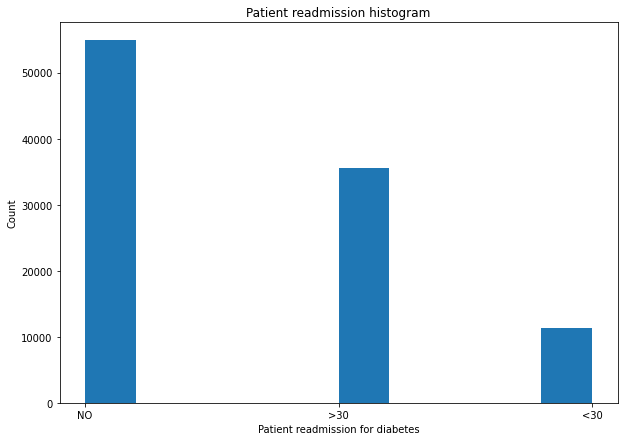

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data_raw['readmitted'])
plt.xlabel('Patient readmission for diabetes')
plt.ylabel("Count")
plt.title('Patient readmission histogram')
plt.show

######Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X_temp = pd.read_csv (r'/content/drive/Shared drives/cogs118A/dataset_diabetes/diabetic_data.csv')
X_temp.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#If the file is in the same folder as the notebook please uncomment and run

#X_temp = pd.read_csv (r './diabetic_data.csv')

In [ ]:
#We remove features 'encounter_id', 'patient_nbr', 'weight' since they provide no useful quantitative information about patient
X_temp.drop(['encounter_id', 'patient_nbr', 'weight'], axis=1, inplace = True)

In [ ]:
#We find the patients that have race as '?'. Should we also remove patients that have 'other' for race. Create a one hot encoding?
l = len(X_temp['race'])
question_race = []
for i in range(l):
  if(X_temp['race'][i] == '?'):
    question_race.append(i)
#Remove the patients that have '?' as race
X_temp.drop(labels=question_race, axis=0, inplace=True)

In [ ]:
#Reset the indeces of the data frame
X_temp.reset_index(drop=True, inplace=True)

In [ ]:
#We find the patients that have gender as 'Unknown/Invalid' and removed them
l1 = len(X_temp['gender'])
question_gender = []
for i in range(l1):
  if(X_temp['gender'][i] == 'Unknown/Invalid'):
    question_gender.append(i)

#Remove the patients that have 'Unknown/Invalid' as race
X_temp.drop(labels=question_gender, axis=0, inplace=True)
#Reset the indeces of the data frame
X_temp.reset_index(drop=True, inplace=True)

In [ ]:
#Convert the intervals from age and give a single integer value
def afun2(St):
    istr = str(St)
    if (len(istr) >= 1):
        return float(istr.split("-")[0].split('[')[1])
    else:
        return float(istr)
X_temp['age'] = X_temp['age'].apply(afun2)

In [ ]:
#Delete columns of data frame that won't be used
X_temp.drop(['admission_type_id','discharge_disposition_id', 'admission_source_id','payer_code','medical_specialty',
'diag_1', 'diag_2', 'diag_3'], axis=1, inplace = True)

In [ ]:
#Prepare data for one hot encoding for race atributte(Will update this in future to make it more efficient)
X_temp.insert(1, 'race_1', X_temp['race'])
X_temp.insert(2, 'race_2', X_temp['race'])
X_temp.insert(3, 'race_3', X_temp['race'])
X_temp.insert(4, 'race_4', X_temp['race'])
X_temp.insert(5, 'race_5', X_temp['race'])
#Remove the race column now that we have the columns for one hot encoding 
X_temp.drop('race', axis=1, inplace=True)
X_temp.reset_index(drop=True, inplace=True)

#Manually perform one hot encoding
def rfun1(Si):
    if (str(Si) == 'AfricanAmerican'):
        return 1.0
    else:
        return 0.0
def rfun2(Si):
    if (str(Si) == 'Asian'):
        return 1.0
    else:
        return 0.0
def rfun3(Si):
    if (str(Si) == 'Caucasian'):
        return 1.0
    else:
        return 0.0
def rfun4(Si):
    if (str(Si) == 'Hispanic'):
        return 1.0
    else:
        return 0.0
def rfun5(Si):
    if (str(Si) == 'Other'):
        return 1.0
    else:
        return 0.0
X_temp["race_1"] = X_temp["race_1"].apply(rfun1)
X_temp["race_2"] = X_temp["race_2"].apply(rfun2)
X_temp["race_3"] = X_temp["race_3"].apply(rfun3)
X_temp["race_4"] = X_temp["race_4"].apply(rfun4)
X_temp["race_5"] = X_temp["race_5"].apply(rfun5)

In [ ]:
#Prepare data for one hot encoding for gender atributte(Will update this in future to make it more efficient)
X_temp.insert(6, 'gender_1', X_temp['gender'])
X_temp.insert(7, 'gender_2', X_temp['gender'])
#Remove the gender column now that we have the columns for one hot encoding
X_temp.drop('gender', axis=1, inplace=True)
X_temp.reset_index(drop=True, inplace=True)

#Manually perform one hot encoding
def gfun1(Si):
    if (str(Si) == 'Female'):
        return 1.0
    else:
        return 0.0
def gfun2(Si):
    if (str(Si) == 'Male'):
        return 1.0
    else:
        return 0.0

X_temp["gender_1"] = X_temp["gender_1"].apply(gfun1)
X_temp["gender_2"] = X_temp["gender_2"].apply(gfun2)

In [ ]:
X_full = X_temp.copy(deep=True)

In [ ]:
X_full.columns

Index(['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'gender_1',
       'gender_2', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
X_full.drop(['max_glu_serum', 'A1Cresult','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','readmitted'], axis=1, inplace = True)

In [ ]:
X_full.columns

Index(['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'gender_1',
       'gender_2', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [ ]:
#Perform one hot encoding for each of the nominal variables described above
mglshe = pd.get_dummies(X_temp.max_glu_serum)
A1he = pd.get_dummies(X_temp.A1Cresult)
mehe = pd.get_dummies(X_temp.metformin)
rehe = pd.get_dummies(X_temp.repaglinide)
nahe = pd.get_dummies(X_temp.nateglinide)
chhe = pd.get_dummies(X_temp.chlorpropamide)
glhe = pd.get_dummies(X_temp.glimepiride)
ache = pd.get_dummies(X_temp.acetohexamide)
glihe = pd.get_dummies(X_temp.glipizide)
glyhe = pd.get_dummies(X_temp.glyburide)
tohe = pd.get_dummies(X_temp.tolbutamide)
pihe = pd.get_dummies(X_temp.pioglitazone)
rohe = pd.get_dummies(X_temp.rosiglitazone)
acahe = pd.get_dummies(X_temp.acarbose)
mihe = pd.get_dummies(X_temp.miglitol)
trhe = pd.get_dummies(X_temp.troglitazone)
tolhe = pd.get_dummies(X_temp.tolazamide)
exhe = pd.get_dummies(X_temp.examide)
cihe = pd.get_dummies(X_temp.citoglipton)
inhe = pd.get_dummies(X_temp.insulin)
glymhe = pd.get_dummies(X_temp['glyburide-metformin'])
glimhe = pd.get_dummies(X_temp['glipizide-metformin'])
pliphe = pd.get_dummies(X_temp['glimepiride-pioglitazone'])
mrhe = pd.get_dummies(X_temp['metformin-rosiglitazone'])
mephe = pd.get_dummies(X_temp['metformin-pioglitazone'])
chahe = pd.get_dummies(X_temp['change'])
diamhe = pd.get_dummies(X_temp['diabetesMed'])

In [ ]:
X_full_v1 = X_full.copy(deep=True)
X_full_v1 = pd.concat([X_full_v1, X_temp['readmitted']], axis=1)
#Functions that convert 'No', '<30', '>30' to numberical values for the labels
def reafun1(Si):
    if (str(Si) == 'NO'):
        return 0.0
    else:
        return 1.0

def reafun2(Si):
    if (str(Si) == 'NO'):
        return 0.0
    elif (str(Si) == '<30'):
        return 1.0
    else:
        return 2.0


X_full_v1["readmitted"] = X_full_v1["readmitted"].apply(reafun2)
X_full_v1.to_csv('/content/drive/Shared drives/cogs118A/dataset_diabetes/X_multy_v1.csv')

In [ ]:
X_full_v2 = X_full.copy(deep=True)
X_full_v2 = pd.concat([X_full_v2, mglshe,A1he], axis=1)
X_full_v2 = pd.concat([X_full_v2, X_temp['readmitted']], axis=1)
X_full_v2["readmitted"] = X_full_v2["readmitted"].apply(reafun2)
X_full_v2.to_csv('/content/drive/Shared drives/cogs118A/dataset_diabetes/X_multy_v2.csv')

In [ ]:
X_full_v3 = X_full.copy(deep=True)
X_full_v3 = pd.concat([X_full_v3, mglshe,A1he, mehe,rehe,nahe,chhe,glhe,ache,
                       glihe,glyhe,tohe,pihe,rohe,acahe,mihe,trhe,tolhe,exhe,
                       cihe,inhe,glymhe,glimhe,pliphe,mrhe,mephe,chahe,diamhe], axis=1)
X_full_v3 = pd.concat([X_full_v3, X_temp['readmitted']], axis=1)
X_full_v3["readmitted"] = X_full_v3["readmitted"].apply(reafun2)
X_full_v3.to_csv('/content/drive/Shared drives/cogs118A/dataset_diabetes/X_multy_v3.csv')

# Proposed Solution


We plan to try out 4 different machine learning algorithms to the problem. Since this is a multi-class(3 classes) classification problem, all of our models should be multi-class classifiers, and we will use type I and type II errors of each class type to test how good our models behave. Here are the 4 models we will use: parametric models(Softmax Regression, Multi-class SVM) and non-parametric models(KNN, Decision Tree or Random Forest). 

- Softmax Regression  
Softmax regression is a generalization of logistic regression to support multi-class classification problems. It utilizes softmax function to compute the probability of the sample belonging to each class. For implementation, we can use sklearn.linear_model.LogisticRegression(multi_class=‘multinomial’).
- Multi-class SVM  
SVM is a model that tries to find a hyperplane(decision boundary) that maximizes the distance between the data points and the class boundary. Since SVM does not support multi-class classification naturally, we can break down our problem to multipale binary classification problems. Since we have 3 classes, we will train 3 SVMs and each SVM predicts the membership of that sample in one of the classes. Regarding implementation details, we can use sklearn.svm.SVC(), where we will try to use different kernels: ‘linear’, ‘poly’, ‘rbf’ and use cross validation(GridSearchCV) to select the best kernel.
- KNN  
K-nearest neighbors classifer first calulates the first k closest neighbors of the data point and predict the label that has the most occurence in the first k nearest neighbors' labels. We will use sklearn.neighbors.KNeighborsClassifier() to implement this and use cross validation(KFold) to select our hyperparameter k.
- Decision Tree or Random Forest  
Decision tree is a way to orgnize our data in an hierarchical way and we can have any decision boundary(linear or non-linear) using decision trees. When building the tree, we select the splits that have the most information gain. We will use sklearn.tree.DecisionTreeClassifier() to implement this algorithm. Still, we are going to experiment with the criterion('gini' or 'entropy') also the max_depth of the tree to prevent overfitting.

We will use the current state-of-the-art model, Deep Neural Network, specifically Multilayer Perceptrons, as our benchmark model.


# Evaluation Metrics
For resource allocation the main 2 cases of concern are having many staff and not enough customers or having too many customers and not enough staff. In a medical setting not having enough doctors and nurses is the worst of the previous 2 cases. Hence the algorithm minimizing the ratio of false negatives will be considered better. Note a false negative is incorrectly predicting the patient will not need readmission (Type 2 error).
If $y$ is the number of patients incorrectly labeled as not needed readmission and $x$ is the number of patients correctly label as needing readmission, then $\text{rate of false negatives} = \frac{y}{x+y}$. 

From a purely finantial point of view being overstaffed is bad for business. Thus, we'll also look at the rate the algorithms incorrectly label a patient as needing readmission within 30 days (Type 1 error).
We will also look at accuracy by computing the ratio between the number of incorrect predictions divided by the number of data points we are trying to classify and see if for these 3 different metrics there's a difference in the algorithm that could be considered better.

# Preliminary Results

For our initial experiments, we are using the variables 'race','gender', 'age', 'time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications' ,'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses'

We use race becasue it in theoy certain groups are more likely to develop diabetes. Hoever, we may reconsider this as most of the subjects belong to a particular group in a proportion higher than expected. Age has a good distribution centered around middle age individuals and we think it's representative of the true diabetes population. The other variables were picked for a similar reason and we wanted to see what kinf of results we could get from numerical values only. Since we were using number of medications, we did not encode each of the drugs. Similarly we looked at the number of diagnosis instead of the type of diagnosis. 'max_glu_serum', 'A1Cresult' were not originally included because many patients did not take those tests.
Version 2 of our dataset had included them, but we did not see any improvement in accuracy. Version 3 has each of the drugs encoded for a total of 98 columns. As you will see below our accuracy is better than random guess, but we will look at the distribution of each of the drugs to decide which ones to include, we'll remove race and see if the diagnosis type will increase accuracy.

For our preliminary analysis, we tried to run three of the models in our proposal on the features that we have selected. 

- **Softmax Regression**

The accuracy that we got by running the softmax regression on testing data is around 0.56.

In [ ]:
# import data
data = pd.read_csv (r'/content/drive/Shared drives/cogs118A/dataset_diabetes/X_multy.csv')
data.drop(columns = 'Unnamed: 0', inplace = True)


In [ ]:
# import pakacages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
# split train and test data
X = data.iloc[:, : -1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# test it with logistic regression
# the accuracy we got is around 0.56
scaler = StandardScaler()
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
pipe = Pipeline([("scaler", scaler), ("logistic", softReg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5651326409405172

In [ ]:
# run the logistic regresion through the Grisearch algorithm to test cifferent hyperparameters C
# we can see that C = 0.5 and C = 1 return very similar performances
scaler = StandardScaler()
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
pipe = Pipeline([("scaler", scaler), ("logistic", softReg)])
param_grid = {'logistic__penalty':['l2'],'logistic__C':[0.5, 1, 10]}
gscv = GridSearchCV(pipe,param_grid)
gscv.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(gscv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.305182,0.198900,0.018738,0.005711,0.5,l2,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'}",0.560681,0.565107,0.566532,0.566907,0.564024,0.56465,0.002235,1
1,0.795925,0.209970,0.009943,0.002884,1,l2,"{'logistic__C': 1, 'logistic__penalty': 'l2'}",0.560681,0.565107,0.566532,0.566907,0.564024,0.56465,0.002235,1
2,0.610433,0.016408,0.008651,0.000633,10,l2,"{'logistic__C': 10, 'logistic__penalty': 'l2'}",0.560681,0.565107,0.566532,0.566907,0.564024,0.56465,0.002235,1


- **KNN**

In [ ]:
# import pakacages
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

In [ ]:
# test the data with KNN
# 

K = []
training = []
test = []
scores = {}
f1_scores = {}
  
for k in range(1, 21):
    scaler = StandardScaler()
    Kneigh = KNeighborsClassifier(n_neighbors = k)
    pipe = Pipeline([("scaler", scaler), ("knn", Kneigh)])
    
    pipe.fit(X_train, y_train)
  
    training_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
    y_pred = pipe.predict(X_test)

    macro = f1_score(y_test, y_pred, average='macro')
    micro = f1_score(y_test, y_pred, average='micro')
    weighted = f1_score(y_test, y_pred, average='weighted')
    

    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    f1_scores[k] = [macro, micro, weighted]

In [ ]:
# print the test
for keys, values in scores.items():
  print(keys, ':', values)

1 : [0.9971046670367092, 0.45579142935461275]
2 : [0.7292638653445146, 0.501720829653093]
3 : [0.710196672617351, 0.506776718545366]
4 : [0.673997509713617, 0.5186550117260074]
5 : [0.6589057741640288, 0.5191423263180337]
6 : [0.6453292128594789, 0.5289495324825633]
7 : [0.6367482260459952, 0.528370846404532]
8 : [0.6291873565460028, 0.5348582219108824]
9 : [0.6224065767563269, 0.5379648524350501]
10 : [0.6180110712731964, 0.5409191971492097]
11 : [0.612340419148202, 0.543203484299333]
12 : [0.6111552828575286, 0.5455182286114579]
13 : [0.6075398670847147, 0.5462187433374958]
14 : [0.6044795151442416, 0.5461882861754942]
15 : [0.602874330548013, 0.5486553162976274]
16 : [0.6012241407761892, 0.5506045746657326]
17 : [0.5988538681948424, 0.5512137179057656]
18 : [0.5972336818734154, 0.5510614320957573]
19 : [0.596123554208734, 0.5510614320957573]
20 : [0.5941733299329423, 0.5533761764078823]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


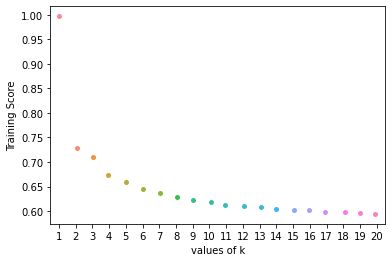

In [ ]:
# display training scores with respect to different k values
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


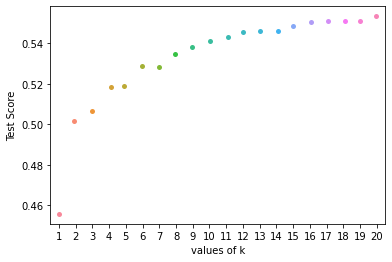

In [ ]:
# display testing scores with respect to different k values
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

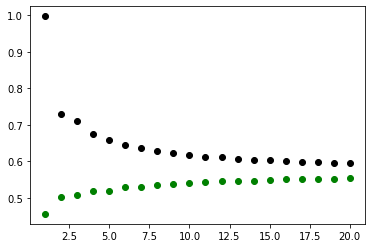

In [ ]:
# display both training & testing scores with respect to different k values
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

- Linear SVM

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import LinearSVC
svm = LinearSVC(dual=False, multi_class='ovr')
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.561203667042305


In [ ]:
parameters = {'penalty':['l1', 'l2'], 'C':[0.5, 1, 10]}
grid_search = GridSearchCV(svm, parameters, cv=5)
grid_search.fit(X, y)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
results

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.229533,1.330308,0.006934,0.000454,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.552842,0.558571,0.549603,0.570057,0.573676,0.56095,0.009434,5
1,1.446257,0.059177,0.008800,0.001165,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.552842,0.558621,0.549603,0.569907,0.573827,0.56096,0.009444,3
2,3.208818,1.280957,0.008536,0.002532,1,l1,"{'C': 1, 'penalty': 'l1'}",0.552842,0.558621,0.549603,0.570057,0.573676,0.56096,0.009432,3
3,1.448568,0.156619,0.006926,0.000370,1,l2,"{'C': 1, 'penalty': 'l2'}",0.552842,0.558621,0.549653,0.570057,0.573827,0.56100,0.009461,1
4,1.279406,0.100009,0.007108,0.000812,10,l1,"{'C': 10, 'penalty': 'l1'}",0.552842,0.558621,0.549603,0.570057,0.573726,0.56097,0.009446,2
5,1.357787,0.097534,0.006725,0.000167,10,l2,"{'C': 10, 'penalty': 'l2'}",0.552842,0.558571,0.549703,0.569756,0.573827,0.56094,0.009394,6


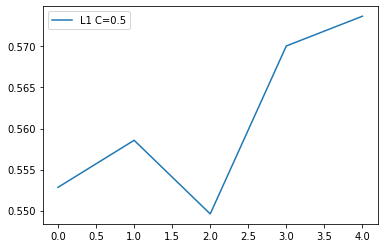

In [ ]:
def get_matrix(results):
    matrix = [[0, 0, 0, 0, 0, 0]]
    for i in range(5):
        key = 'split' + str(i) + '_test_score'
        matrix = np.vstack((matrix, results[key]))
        
    return matrix[1:, :]

matrix = get_matrix(grid_search.cv_results_)

plt.plot(matrix[:, 0], label='L1 C=0.5')
plt.legend()
plt.show()

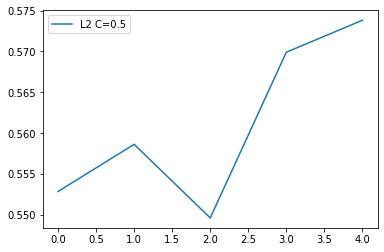

In [ ]:
plt.plot(matrix[:, 1], label='L2 C=0.5')
plt.legend()
plt.show()

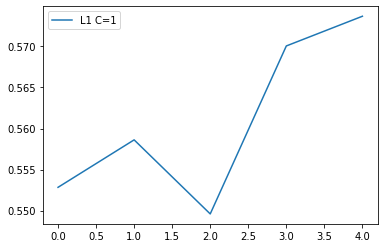

In [ ]:
plt.plot(matrix[:, 2], label='L1 C=1')
plt.legend()
plt.show()

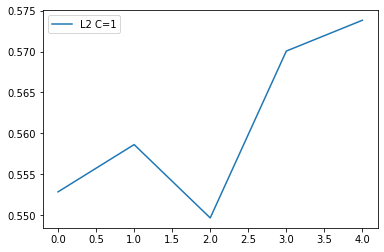

In [ ]:
plt.plot(matrix[:, 3], label='L2 C=1')
plt.legend()
plt.show()

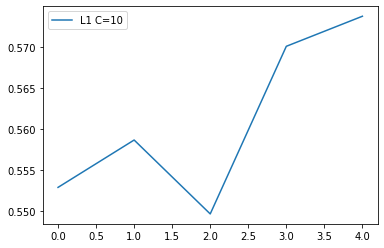

In [ ]:
plt.plot(matrix[:, 4], label='L1 C=10')
plt.legend()
plt.show()

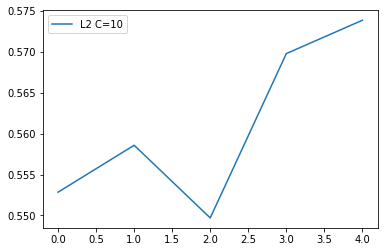

In [ ]:
plt.plot(matrix[:, 5], label='L2 C=10')
plt.legend()
plt.show()

# Ethics & Privacy


##Data Collection:

###Our Concerns:
1) Did we consider what biases could affect our data collection? Are there any biases in our datasets? 

2) How can we limit exposure of the subjects?

###Measures: 

We will be careful when generalizing our results such as, not making claims that our results can be generalized to the entire population. The dataset is disidentified in order to limit exposure of the subjects. Also all the subjects are aware of what data has been collected, for what purpose, and on agreement.  

##Models:

###Our Concerns:

1) Are we sure that our models do not rely on unfair variables? Are we unknowingly or knowingly choosing discriminatory variables? Can we say with certainty that our Model fair?

2) Can anyone easily explain and understand the decisions made by the model and the results? Is there any thing about the process or the results of the model that can confuse others?

3) Have we clearly addressed any and all limitations or shortcoming of our models? Have we purposefully marginalized any limitations to make us look good? Can people clearly explain when to use our model and when not to?

###Measures: 

In order to make sure there is no bias in our model, we have selected a large dataset to control for any potential sample bias or prejudice bias. We will make sure to make as few assumptions as possible to keep the bias low. We will also document any limitations or shortcomings with our model. We will also document any problems we faced while working with the models and what steps we took to solve them.


##Analysis:

###Our Concerns:

1) Are there any blindspots in our analysis? Any missing perespectives?

2) Are the visualizations we are using and the statistics we calculated honest? Are we accurately communicating the results of our experiments?  

3) Can this experiment and analysis be reproduced? If people reuse our model and datasets, will they come to same conclusion as us? 

###Measures: 

We have taken steps to make sure that our data and models have no biases in them. Any statsitics or claims used in the analysis will be referenced for the readers to verify. In order to make sure that our experiment and analysis is reproducible we will make sure each step we took is clear and understandable. This will allow others to easily reproduce our results using our models and datasets.      



# Team Expectations 

How will we interact/communicate as a team?

- We have a discord server where we are all added. Any communication about the project will take place there. Links to all project related materials such as code and documentations can also be found there

- We also have shared our email addresses for any other communications

- Online and in-person meetings for anything that needs team attention and discussion 

How will we handle conflict and difficulty?

- If there are any questions that any member may have they can ask them in the discord server or through email

- If there are any major conflicts that arise, they will be immediately be addressed in the discord server. If anything requires team discussion we can meet online or in-person as needed

How will we handle making decisions and setting goals/schedule?

- All decisions and goal setting/scheduling happen in the discord server or during planned in-person or online meetings

How much work do we expect from each other?

- We will all be assigned weekly tasks that we will work on. At the end of the week we update the team about our progress. We will also actively make sure each member feels that the work assigned is fair and there are no concerns

How will we handle deadlines?

- We will set deadlines that everyone can agree upon and manage given their schedule. 



# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  7:30 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; Discuss dataset and possible solutions | 
| 4/22  |  7:30 PM |  Draft project proposal | Proofread the proposal; submit project proposal | 
| 4/27  | 7:30 PM  | Download the dataset and take a look at the dataset  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/4  | 7:30 PM  | Import & Wrangle Data ,do some data cleaning (all) | Review/Edit wrangling/EDA; Discuss Machine Learning Algorithm Plan   |
| 5/11  | 7:30 PM  | Finalize wrangling/EDA; Begin trying out different algorithms for project (all) | Discuss/finish project checkpoint; Submit project checkpoint|
| 5/25  | 12 PM  | Complete all experiments; Draft results/conclusion/discussion (all)| edit/finalize full project |
| 6/7  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="abc"></a>1.[^](#abc):Mayo Foundation for Medical Education and Research. (2021, January 20). Type 2 diabetes. Mayo Clinic. Retrieved April 23, 2022, from https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193#:~:text=Potential%20complications%20of%20diabetes%20and,damage%20(neuropathy)%20in%20limbs. <br> 
<a name="admonishnote"></a>2.[^](#admonishnote): Ostling, S., Wyckoff, J., Ciarkowski, S. L., Pai, C.-W., Choe, H. M., Bahl, V., &amp; Gianchandani, R. (2017, March 22). The relationship between diabetes mellitus and 30-day readmission rates - clinical diabetes and endocrinology. BioMed Central. Retrieved April 23, 2022, from https://clindiabetesendo.biomedcentral.com/articles/10.1186/s40842-016-0040-x <br>
<a name="wfds"></a>3.[^](#wfds): Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., &amp; Clore, J. N. (2014, April 3). Impact of hba1c measurement on hospital readmission rates: Analysis of 70,000 clinical database patient records. BioMed Research International. Retrieved April 23, 2022, from https://doi.org/10.1155/2014/781670.

<a name="ander"></a>4.[^](#ander): Andersen, R., & Aday, L. A. (1978). Access to Medical Care in the U.S.: Realized and Potential. Medical Care, 16(7), 533–546. http://www.jstor.org/stable/3763653

<a name="ziller"></a>5.[^](#ziller):Ziller, E. (2014). Access to medical care in rural America. Rural public health: Best practices and preventive models, 11-28.